<a href="https://colab.research.google.com/github/levivanni/MachineLearningNotes/blob/main/Horse_or_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
cd MyDrive/ML/Horse-or-Human/

/content/drive/MyDrive/ML/Horse-or-Human


In [57]:
cd /content/drive/MyDrive/ML/Horse-or-Human/data

/content/drive/MyDrive/ML/Horse-or-Human/data


(300, 300, 4)


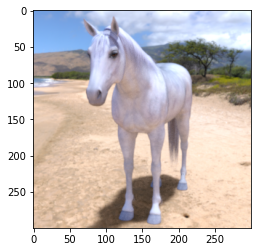

In [38]:
import matplotlib.pyplot as plt
img = plt.imread('horse01-0.png')
print(img.shape)
plt.imshow(img)
plt.show()

In [59]:
train_folder = './train'
valid_folder = './valid'

In [60]:
train_horses = 'train/horses'
train_humans = 'train/humans'
valid_horses = 'valid/horses'
valid_hhumans = 'valid/humans'

In [61]:
import tensorflow.keras as keras

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [63]:
model = Sequential()

In [64]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))

In [65]:
model.add(MaxPooling2D(2, 2))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [68]:
model.add(MaxPooling2D(2, 2))

In [69]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [70]:
model.add(MaxPooling2D(2, 2))

In [71]:
model.add(Flatten())

In [72]:
model.add(Dense(512, activation='relu'))

In [73]:
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [81]:
from keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

In [75]:
from keras.preprocessing.image import ImageDataGenerator

In [76]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

In [77]:
generated_train_data = train_generator.flow_from_directory(
    train_folder, 
    target_size=(150,150), 
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [78]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder, 
    target_size=(150,150), 
    batch_size=128,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [82]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = generated_valid_data,
    validation_steps = 8
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
8/8 [==============================] - 40s 3s/step - loss: 1.5700 - acc: 0.6260 - val_loss: 0.2867 - val_acc: 0.8828
Epoch 2/15
8/8 [==============================] - 22s 3s/step - loss: 0.3081 - acc: 0.8490
Epoch 3/15
8/8 [==============================] - 24s 3s/step - loss: 0.2307 - acc: 0.8966
Epoch 4/15
8/8 [==============================] - 22s 3s/step - loss: 0.1214 - acc: 0.9663
Epoch 5/15
8/8 [==============================] - 22s 3s/step - loss: 0.0619 - acc: 0.9768
Epoch 6/15
8/8 [==============================] - 24s 3s/step - loss: 0.2601 - acc: 0.8930
Epoch 7/15
8/8 [==============================] - 22s 3s/step - loss: 0.0410 - acc: 0.9873
Epoch 8/15
8/8 [==============================] - 22s 3s/step - loss: 0.0274 - acc: 0.9917
Epoch 9/15
8/8 [==============================] - 24s 3s/step - loss: 0.3586 - acc: 0.8718
Epoch 10/15
8/8 [==============================] - 23s 3s/step - loss: 0.0451 - acc: 0.9870
Epoch 11/15
8/8 [==============================] - 2

In [86]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img) / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  print(images.shape)

  classes = model.predict(images, batch_size=10)

  if classes[0] > 0.5:
    print(fn + 'is a human')
  else:
    print(fn + 'is a horse')

Saving OE-Photo-Getty-1020-for-Web-FI.jpg to OE-Photo-Getty-1020-for-Web-FI.jpg
(1, 150, 150, 3)
OE-Photo-Getty-1020-for-Web-FI.jpgis a horse
